# -  Projeto de Testes Estatísticos


Importando o dataset do The Movie Data Base (sample com 5000 filmes para ficar leve).


In [ ]:
import pandas as pd

tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Visualizando a distribuição da nota média dos filmes utilizando o ```distplot()``` do  **seaborn**.



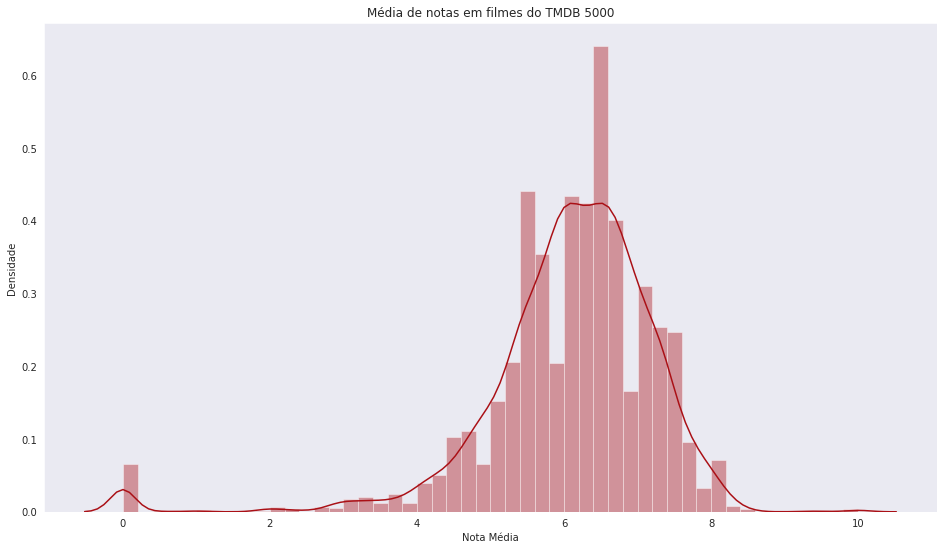

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")
sns.set_palette('Reds_r')


plt.figure(figsize=(16,9))


ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel="Nota Média", ylabel="Densidade")
ax.set_title("Média de notas em filmes do TMDB 5000")

plt.show()

Note que o ```distplot``` faz a distribuição normalizada por padrão. Para ver a frequência absoluta dos valores, precisamos setar o parâmetro  ```norm_hist=False```.

Além disso, é necessário desabilitar a função aproximada que ele apresenta fazendo ```kde=False``` pois, por padrão, sempre que este parâmetro estiver ativado, a distribuição será normalizada.

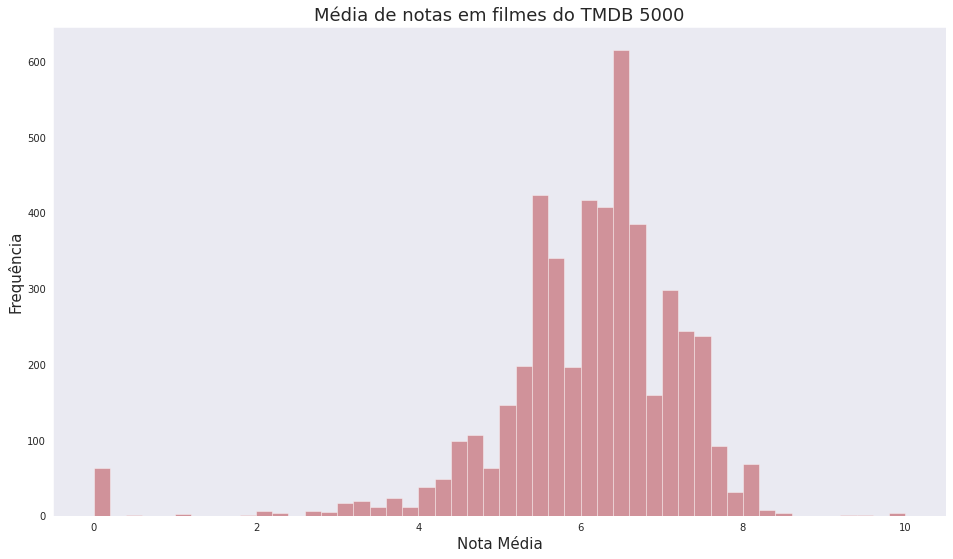

In [ ]:

plt.figure(figsize=(16,9))

ax = sns.distplot(tmdb.vote_average, norm_hist=False, kde=False)
ax.set_xlabel("Nota Média", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Média de notas em filmes do TMDB 5000", fontsize=18)

plt.show()

Outra visualização interessante para aplicar a estes dados é o *boxplot*, para ver mais caractecterísticas de forma gráfica, como por exemplo, os quartis, a mediana e os outliers.


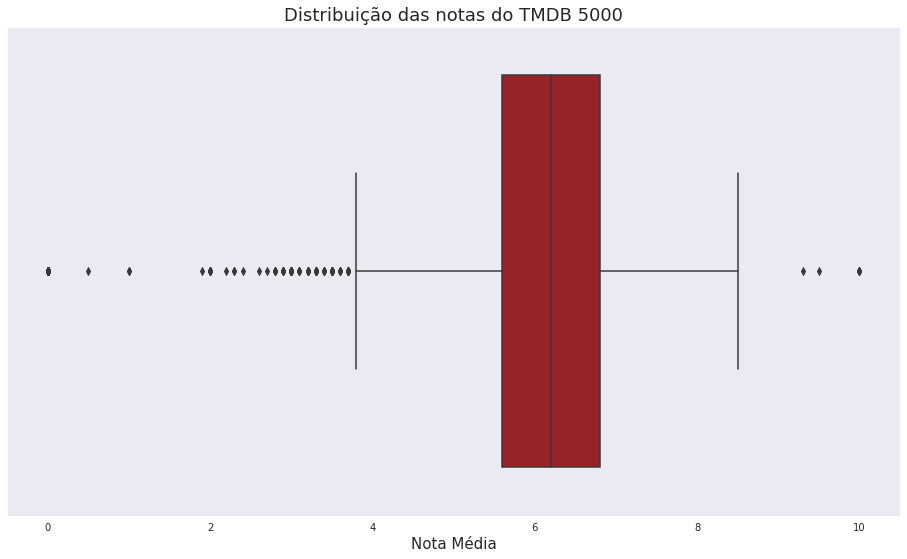

In [ ]:
plt.figure(figsize=(16,9))

ax =sns.boxplot(tmdb["vote_average"])
ax.set_xlabel("Nota Média", fontsize=15)
ax.set_title("Distribuição das notas do TMDB 5000", fontsize=18)

plt.show()

Observando os gráficos gerados acima, identifica-se um possível problema pois há pontos com média 0 e 10, o que seria improvável de representar a avaliação real de filmes avaliados por um grande público.

Vamos verificar quem são esses filmes.

In [ ]:
tmdb.query("vote_average == 0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


Para o caso dos filmes com nota zero, percebemos 63 ocorrências onde isso ocorreu pois não houve nenhum voto nestes. Provavelmente o sistema do TMDB associa uma média zero para filmes sem avaliação.

Isso, porém, não reflete a realidade pois não necessariamente esses filmes são terríveis. Por isso, vamos descartar esses dados das análises.



In [ ]:
tmdb.query("vote_average == 10")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


Nos filmes com média 10, isso ocorreu em 4 casos onde os filmes tiveram poucas avaliação (menos de 10). 

Dessa forma, se eliminarmos os filmes com poucas avaliações, teremos um panorama mais próximo da realidade. 

In [ ]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10")
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Vamos comparar as estatísticas descritivas e as distribuições entre o grupo de dados com e sem esses filmes com poucas avaliações.


In [ ]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


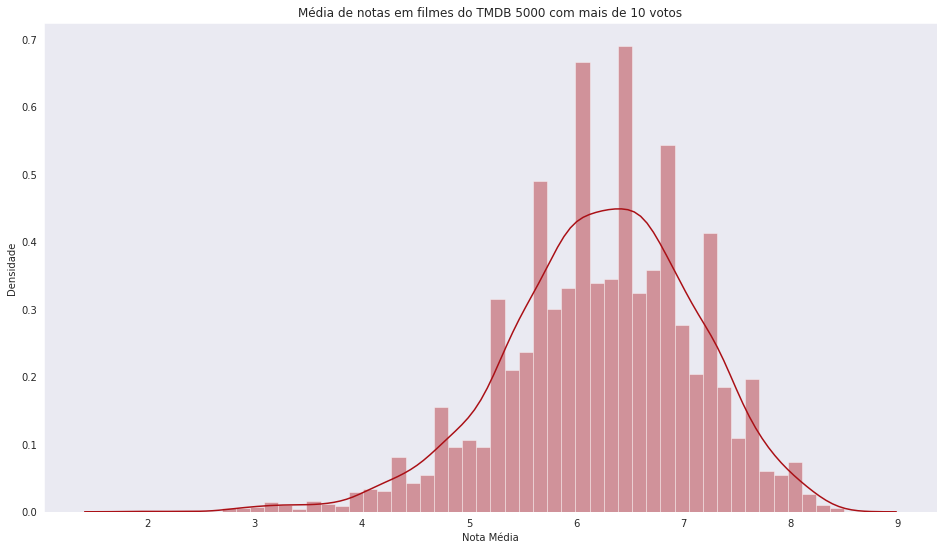

In [ ]:

plt.figure(figsize=(16,9))


ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota Média", ylabel="Densidade")
ax.set_title("Média de notas em filmes do TMDB 5000 com mais de 10 votos")

plt.show()

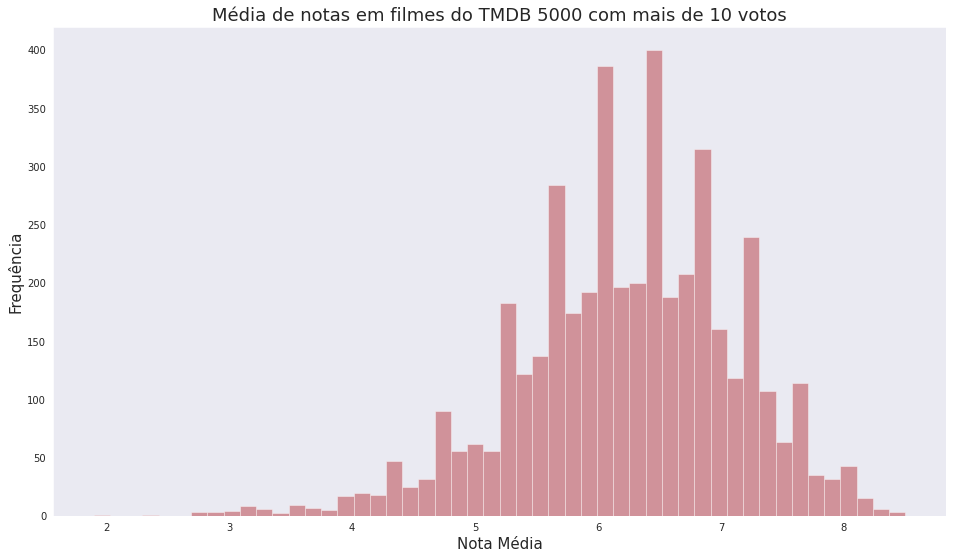

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist=False, kde=False)
ax.set_xlabel("Nota Média", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Média de notas em filmes do TMDB 5000 com mais de 10 votos", fontsize=18)

plt.show()

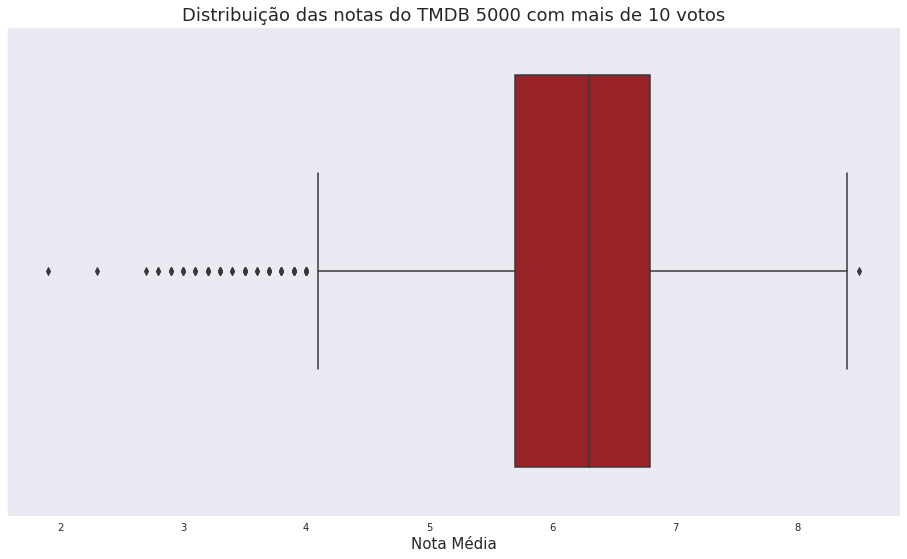

In [ ]:
plt.figure(figsize=(16,9))

ax =sns.boxplot(tmdb_com_mais_de_10_votos["vote_average"])
ax.set_xlabel("Nota Média", fontsize=15)
ax.set_title("Distribuição das notas do TMDB 5000 com mais de 10 votos", fontsize=18)

plt.show()

Somente observando as tabelas acima, já podemos ver uma mudança significativa em todas as medidas. Porém, ao visualizar a disrtibuição, fica ainda mais evidente que ao eliminar esses dados, esta se aproxima mais de uma distribuição normal, porém com uma cauda esquerda maior.

## Comparação com o dataset do MovieLens

Importando os dados do DataSet do arquivo "ratigns.csv" (lembrando que é necessário carregar o arquivo todo início de sessão).  

In [ ]:
movieLens = pd.read_csv("ratings.csv")
filmes = pd.read_csv("movies.csv")
movieLens.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Os dados do movieLens não vêm com a média dos filmes salva diretamente no DataFrame. Vamos calculá-la manualmente.

In [ ]:
media_movieLens = movieLens.groupby("movieId").mean()["rating"]
media_movieLens.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Uma vez obtidos os dados, podemos inserí-los no dataframe principal.

In [ ]:
media_movieLens.name = "nota_media"
movieLens = movieLens.join(media_movieLens,on="movieId")
movieLens.head()


,userId,movieId,rating,timestamp,nota_media
0,1,1,4.0,964982703,3.920930
1,1,3,4.0,964981247,3.259615
2,1,6,4.0,964982224,3.946078
3,1,47,5.0,964983815,3.975369
4,1,50,5.0,964982931,4.237745


Vamos agora visualizar a distribuição destas notas médias.

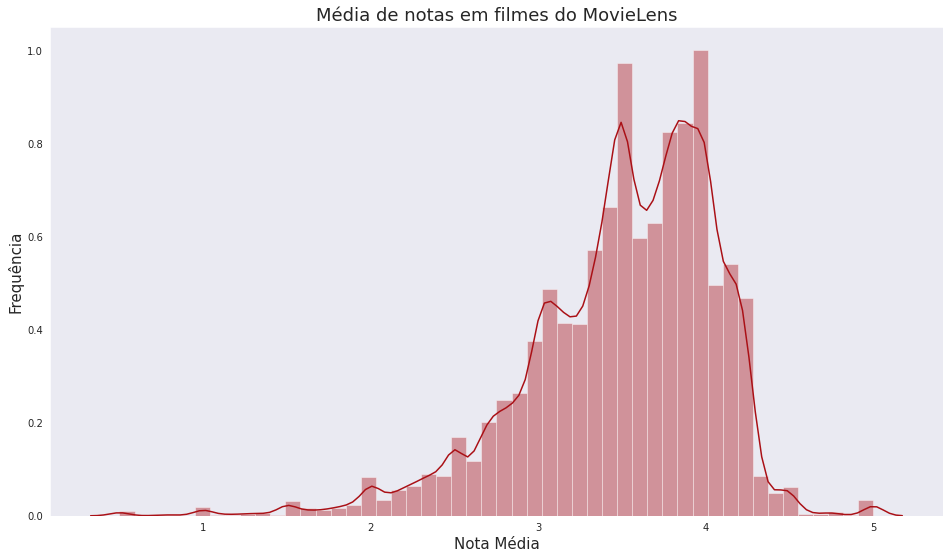

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(movieLens.nota_media)
ax.set_xlabel("Nota Média", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Média de notas em filmes do MovieLens", fontsize=18)

plt.show()

É possível perceber algumas flutuações próximo as notas mais baixas, da mesma forma que havia ocorrido no TMDB. Vamos aplicar o mesmo filtro que aplicamos anteriormente, excluindo filmes que possuam menos de 10 avaliações.


In [ ]:
contagem_movieLens = movieLens.groupby("movieId").count()
selecao = contagem_movieLens.query("rating >= 10").index.values

media_movieLens_com_mais_de_10_votos = media_movieLens.loc[selecao]
media_movieLens_com_mais_de_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: nota_media, dtype: float64

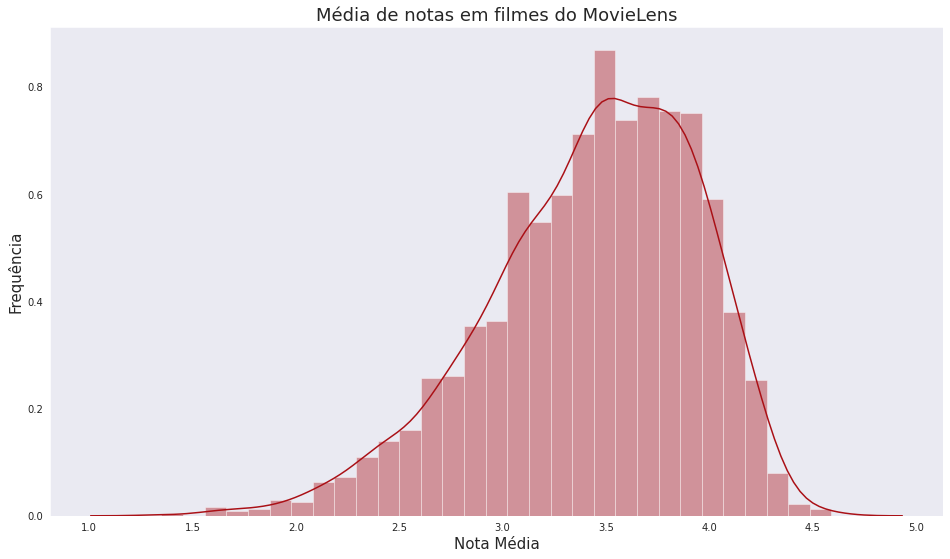

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(media_movieLens_com_mais_de_10_votos)
ax.set_xlabel("Nota Média", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Média de notas em filmes do MovieLens", fontsize=18)

plt.show()

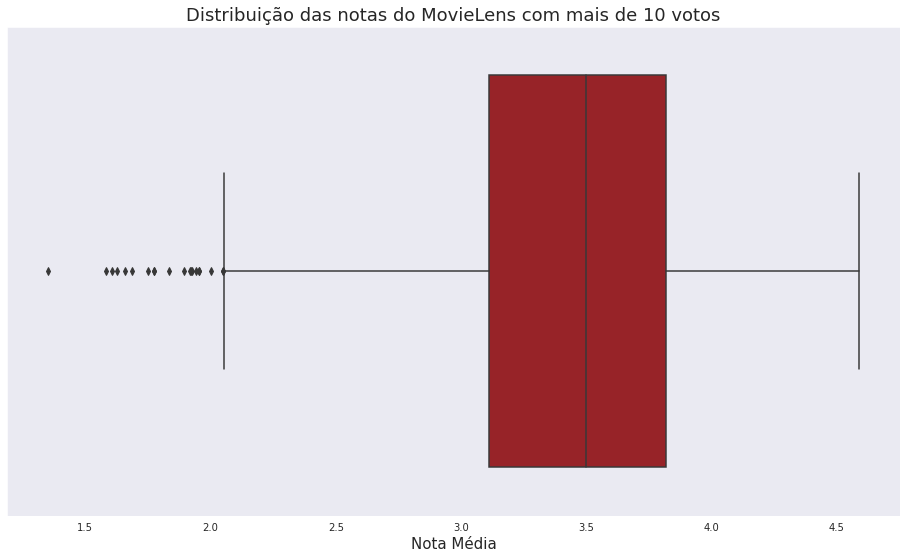

In [ ]:
plt.figure(figsize=(16,9))

ax =sns.boxplot(media_movieLens_com_mais_de_10_votos)
ax.set_xlabel("Nota Média", fontsize=15)
ax.set_title("Distribuição das notas do MovieLens com mais de 10 votos", fontsize=18)

plt.show()

Logo, podemos observar, visualmente, que a distribuição se assemelha muito como resultado observado no TMDB, o que evidencia que o comportamento desta variável está sendo representado corretamente pois os dados são de origens diferentes.



## Visualizando a distribuição cumulativa

Uma outra forma visual de entender o que as notas de cada filme representam em relação ao todo, é observar o histograma de forma cumulativa. Assim, podemos ver mais claramente o quão "boa" é a nota de um filme em relação ao todo.

Vamos ver primeiro a distribuição com os dados do movieLens:


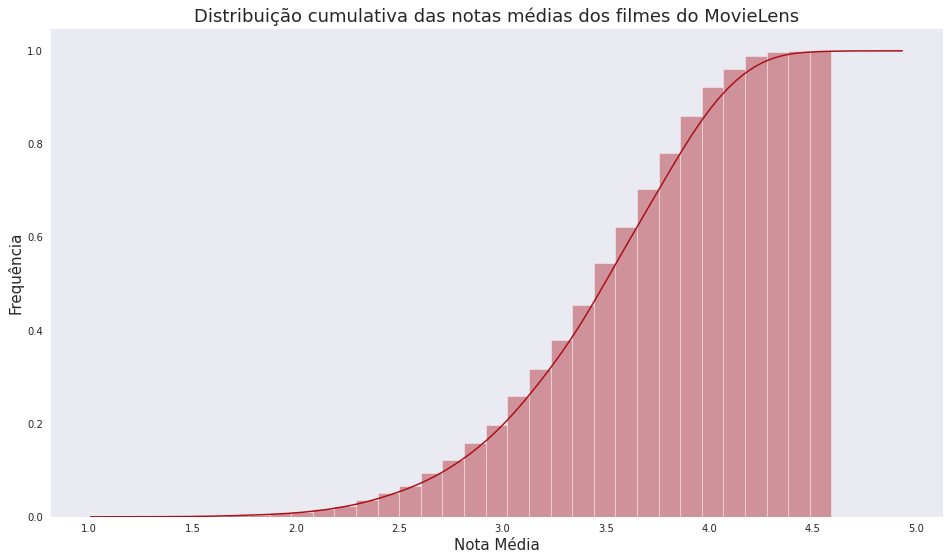

In [ ]:
 plt.figure(figsize=(16,9))

ax = sns.distplot(media_movieLens_com_mais_de_10_votos,
                  hist_kws= {'cumulative' : True},
                  kde_kws={'cumulative' : True})
ax.set_xlabel("Nota Média", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Distribuição cumulativa das notas médias dos filmes do MovieLens", fontsize=18)

plt.show()

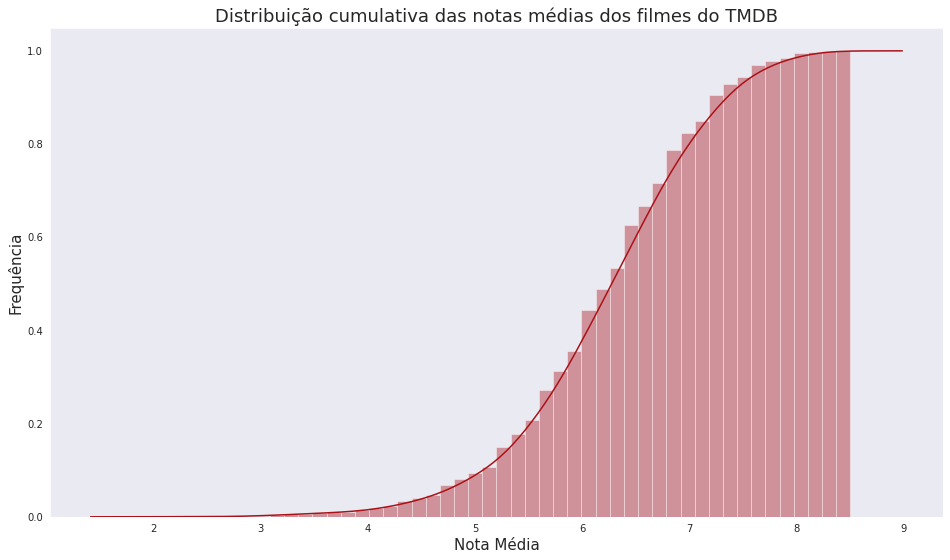

In [ ]:
 plt.figure(figsize=(16,9))

ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,
                  hist_kws= {'cumulative' : True},
                  kde_kws={'cumulative' : True})
ax.set_xlabel("Nota Média", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Distribuição cumulativa das notas médias dos filmes do TMDB", fontsize=18)

plt.show()

# Analisando a distribuição dos dados 


Vamos dar uma olhada em outras distribuições que existem no TMDB, pois há vários outros campos com informações interessantes neste dataset. Para relembrarmos quais são eles, vamos abrir o DataFrame de novo.

In [ ]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Número de votos

Vamos selecionar alguns desses parâmetros para visualizar a distribuição e ver como eles se comportam. Vamos ver primeiro a distribuição de votos para cada filme.

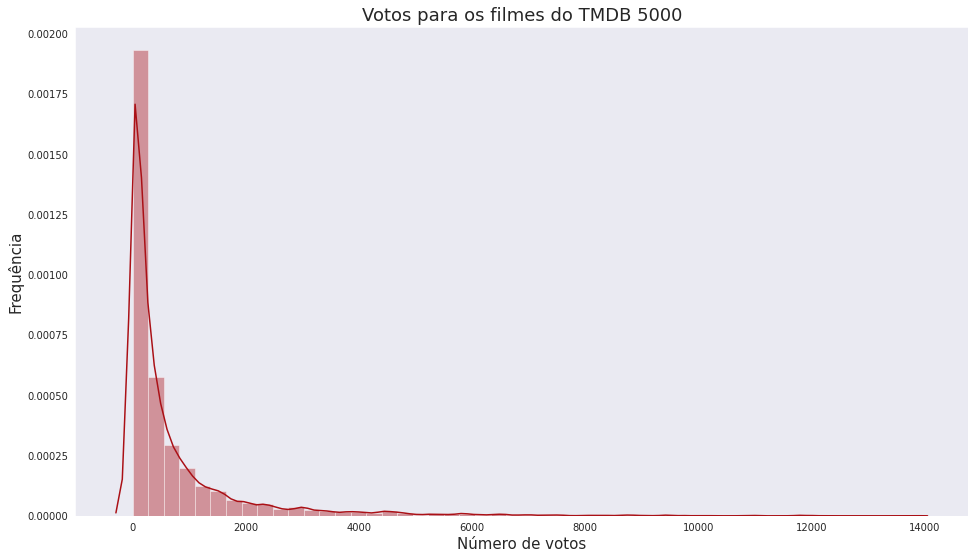

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(tmdb.vote_count)
ax.set_xlabel("Número de votos", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Votos para os filmes do TMDB 5000", fontsize=18)

plt.show()

Podemos ver que nesse caso não temos uma distribuição parecida com a normal, mas algo parecido com uma exponencial. Neste tipo de distribuição, a maior parte dos valores acumulam valores baixos, e a menor os mais altos.

Isso demosntra que poucos filmes tem muitas avaliações, e que a grande maioria possui poucos votos.

Existe outra medida do TMDB que pode ajudar a demonstrar isso, a popularidade.

## Popularidade


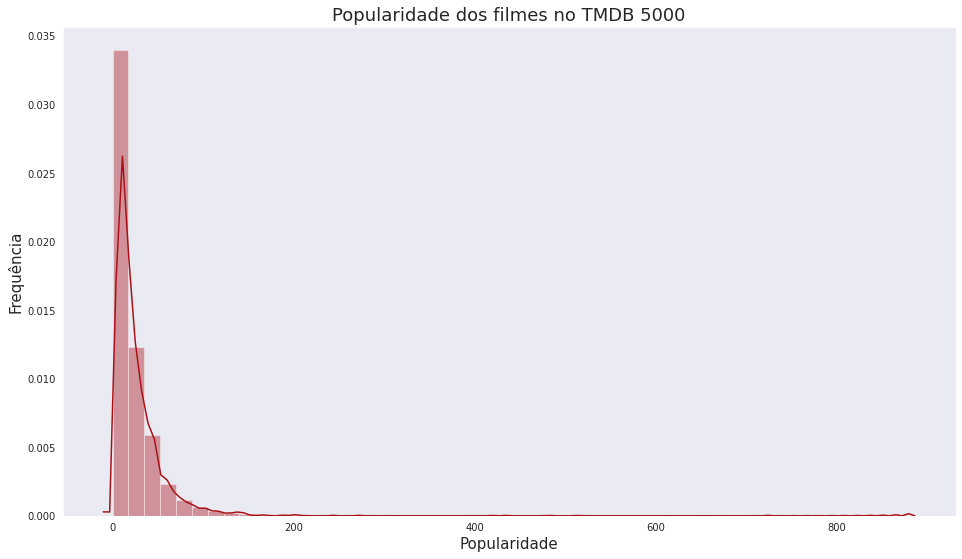

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(tmdb.popularity)
ax.set_xlabel("Popularidade", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Popularidade dos filmes no TMDB 5000", fontsize=18)

plt.show()

A popularidade é uma medida do TMDB, e podemos ver que a distribuição desses valores é muito próxima do número de votos. Isso demonstra que de fato, filmes mais populares recebem mais avaliações.


## Orçamentos

Este tipo de distribuição também é comum em orçamentos, visto que poucos filmes possuem gastos milionários. Vamos verificar isso.

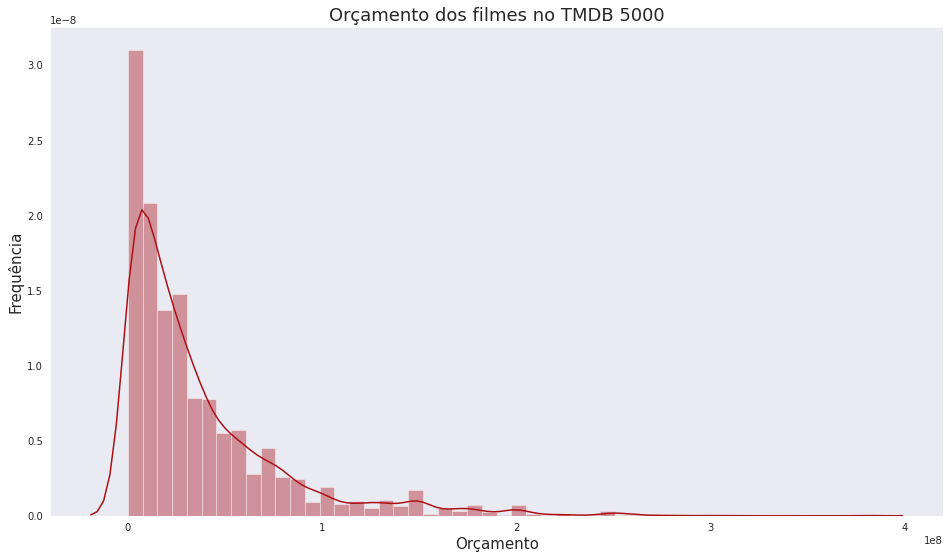

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set_xlabel("Orçamento", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Orçamento dos filmes no TMDB 5000", fontsize=18)

plt.show()

Percebendo que alguns dados estavam com orçamento nulo, e sabendo que isso não condiz com a realidade, realizamos uma query no plot para pegar apenas os valores maiores que zero.

## Tempo de duração


Por último vamos ver o tempo de duração (*runtime*) dos filmes. Neste caso, os valores desconhecidos pelo tmdb foram registrados como vazios (```NaN```). Precisamos eliminar esses valores para plotar a distribuição, uma vez que o *seaborn* não interpreta esses valores.

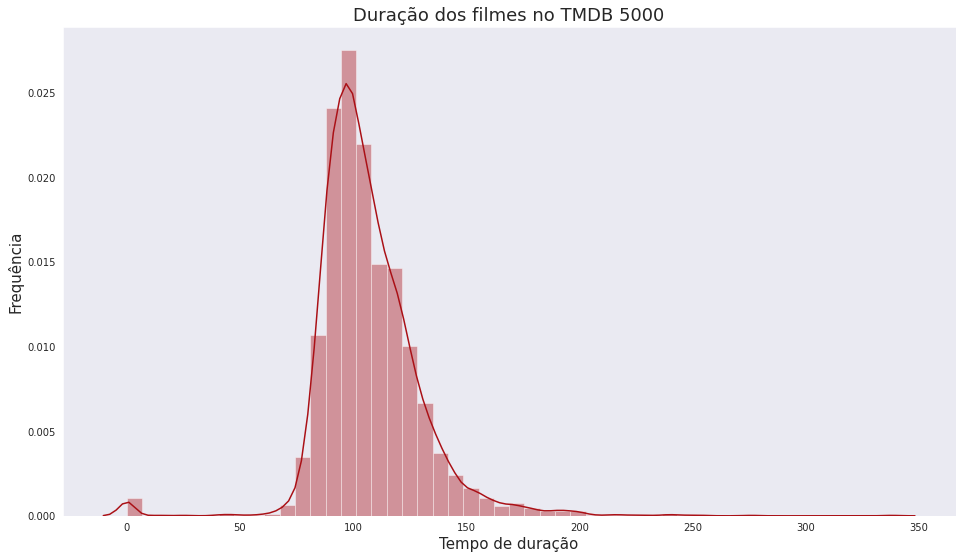

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(tmdb.runtime.dropna())
ax.set_xlabel("Tempo de duração", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Duração dos filmes no TMDB 5000", fontsize=18)

plt.show()

Neste caso, podemos perceber há um pequeno pico no zero ```0``` também. Apesar de haver valores com ```NaN```, isso é um indício de que há registros errados. Vamos remover esses valores.

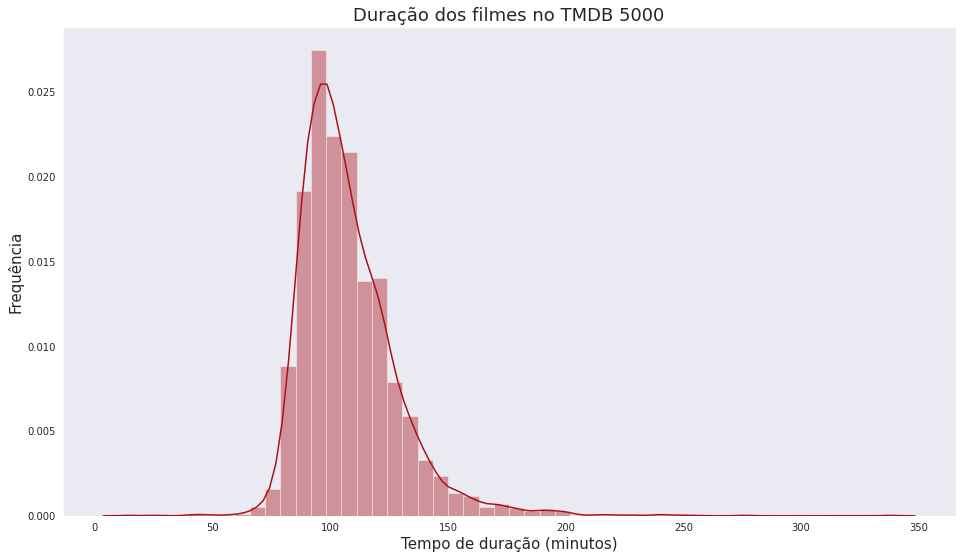

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna())
ax.set_xlabel("Tempo de duração (minutos)", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Duração dos filmes no TMDB 5000", fontsize=18)

plt.show()

Observando esta distribuição, percebemos uma distribuição parecida com a normal, porém com uma cauda à direita. 

Podemos observar os dados cumulativos desta distribuição também, para ter uma noção de como as durações de cada filme estão em relação aos demais.


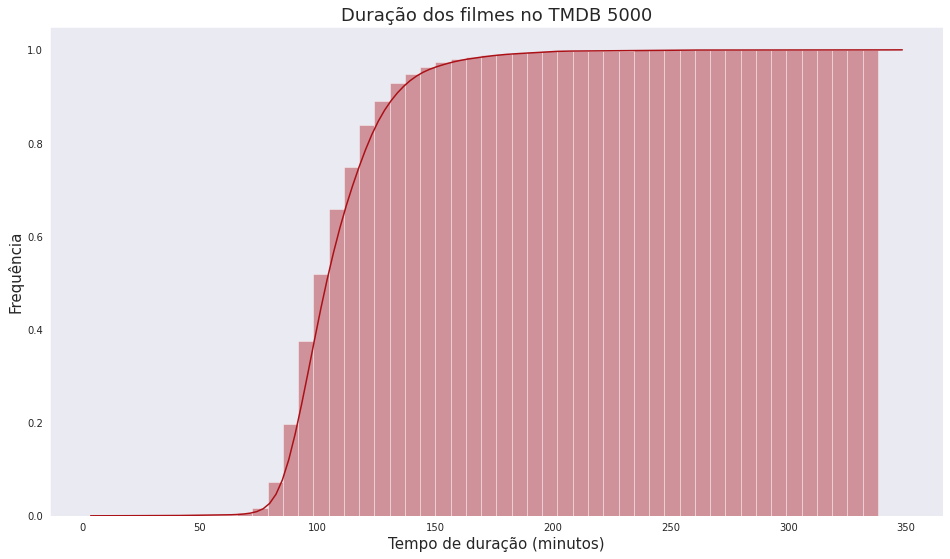

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna(),
                  hist_kws = {'cumulative' : True},
                  kde_kws = {'cumulative' : True})
ax.set_xlabel("Tempo de duração (minutos)", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Duração dos filmes no TMDB 5000", fontsize=18)

plt.show()

Podemos ver que poucos filmes possuem mais de duas horas (120 minutos). Se quisermos saber o quantil exato, podemos checar isso direto da base de dados da forma.

In [ ]:
tmdb.query("runtime > 0").runtime.dropna().quantile(0.8)

121.0

O comando ```quantile()``` representa o valor o valor que divide a porcentagem indicada nos dados. Nesse caso, 0.8 signfica o valor que está acima de 80% dos demais (121 minutos).

# Testes estatísticos

Até agora, vimos diversas medidas para dois datasets diferentes (MovieLens e TMDB). Mas como podemos ver se essas medidas representam a realidade? E se representam, qual a confiabilidade disso?

O tamanho da amostra é muito importante para definir isso. Vamos primeiro observar a influência da quantidade de dados que temos sobre o valor da média observado.

## Influência do tamanho da amostra

Comparando o valor da média dos filmes (com mais de 10 votos) tomando apenas os 5 primeiros, com a média total


In [ ]:
print("Média dos 5 primeiros: ",media_movieLens_com_mais_de_10_votos[0:5].mean())
print("Média total ",media_movieLens_com_mais_de_10_votos.mean())

Média dos 5 primeiros:  3.5259741603585653
Média total  3.4320503405352603


Essa diferença tende a ser reduzida conforme aumentamos o número de elementos considerados no cálculo da média.

In [ ]:
medias = list()
medias = [media_movieLens_com_mais_de_10_votos[0:i].mean() for i in range(1,len(media_movieLens_com_mais_de_10_votos))]

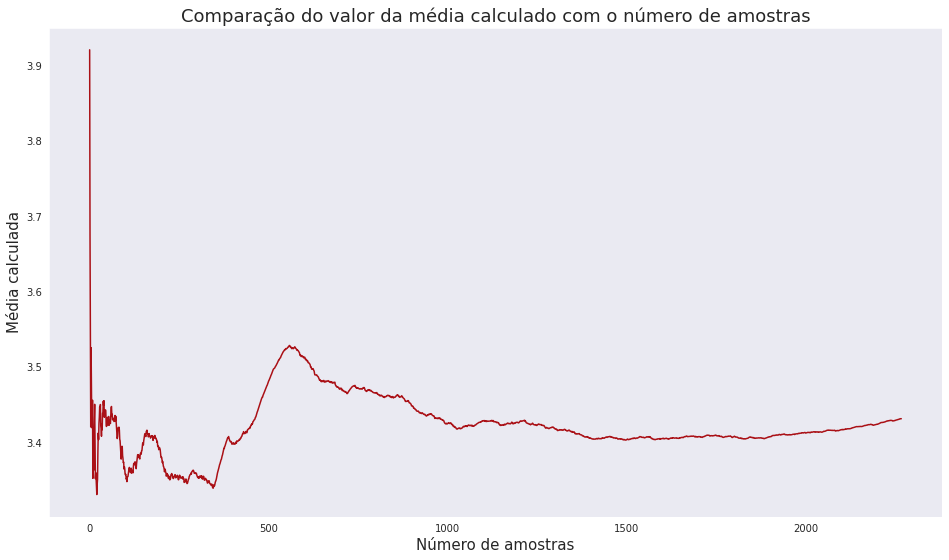

In [ ]:
fig,ax = plt.subplots(figsize=(16,9))


ax.plot(medias)
ax.set_xlabel("Número de amostras", fontsize=15)
ax.set_ylabel("Média calculada", fontsize=15)
ax.set_title("Comparação do valor da média calculado com o número de amostras", fontsize=18)

plt.show()

Podemos ver que os valores da média sofrem grandes variações quando temos poucas amostras, mas tendem a convergir para um valor estável conforme aumentamos o número de dados disponíveis para o cálculo da média.

Vamos verificar se há alguma influência da ordenação dos dados. Para isso, iremos reordenar a Series com os dados das médias de forma aleatória.

In [ ]:
import numpy as np


np.random.seed(0xC0FF33)

medias_reordenadas = media_movieLens_com_mais_de_10_votos.sample(frac=1)


medias = list()
medias = [medias_reordenadas[0:i].mean() for i in range(1,len(medias_reordenadas))]

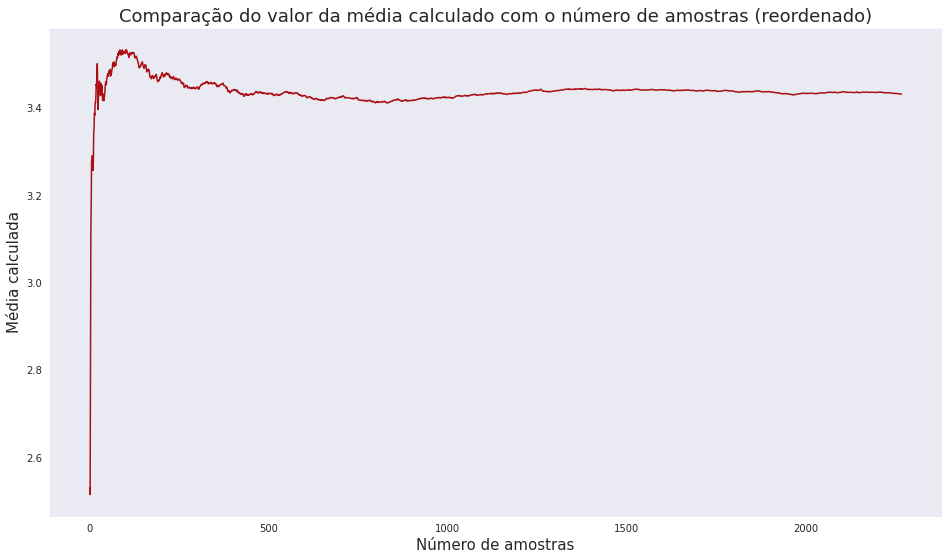

In [ ]:
fig,ax = plt.subplots(figsize=(16,9))


ax.plot(medias)
ax.set_xlabel("Número de amostras", fontsize=15)
ax.set_ylabel("Média calculada", fontsize=15)
ax.set_title("Comparação do valor da média calculado com o número de amostras (reordenado)", fontsize=18)

plt.show()

Eliminando o efeito da ordenação prévia da Series (pode ser que as médias estejam seguindo um padrão qualquer do movieLens), fica  ainda mais evidente o efeito assintótico da média. Esse efeito é característico de variáveis aleatórias que seguem distribuições semelhantes à normal.

## Encontrando os intervalos de confiança

Os gráficos anteriores demosntraram, de forma visual, como o aumento do número de informações sobre determinada variável aumetna a confiança que temos de que aquele valor está mais próximo de representar a realidade. Porém, qual é o intervalo que **realmente** podemos tomar como confiável?

para responder essa pergunta, precisamos calcular o *intervalo de confiança*. Este intervalo é calculado em função de um nível de significância $\alpha$ (normalmente usamos 5%), e pode ser utilizando em função da distribuição t de student (amostras pequenas, quando há menos de 30 valores) ou pela distribuição z, baseada na normal (amostras grandes, acima de 30 valores).

Como temos mais de 2000 valores, podemos usar direto a z para obter o intervalo. No Python, ele é obtido através da função ```zconfint```, do módulo StatsModels.

In [ ]:
from statsmodels.stats.weightstats import zconfint

zconfint(media_movieLens_com_mais_de_10_votos)

(3.4112459477469557, 3.452854733323563)

Como o $\alpha$ padrão da função já é o de 5%, podemos chamá-la passando apenas a Series com os dados das médias como entrada. O resultado representa o intervalo de confiança obtido. A interpretação correta deste intervalo é:

*Temos 95% de certeza de que a média das notas de filmes, variando de 0.5 a 5, está entre 3.4112459477469557 e 3.452854733323563*


## investigando um filme em específico

Até agora, vimos como é feito para identificar o intervalo de confiança da média de uma variável em relação a população que ela representa. E se quisermos comparar um valor específico com essa média? 

Por exemplo, supondo que precisemos avaliar a nota do *Toy Story* (o filme 1 no database do MovieLens). Como garantimos que a nota dele é significativamente diferente da média do restante dos outros filmes?

Pra responder essa pergunta, vamos primeiro verificar como é a nota média do *Toy Story* em nossa amostra.

In [ ]:
notas_toy_story = movieLens.query("movieId == 1").rating
notas_toy_story.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

Ao observamos as estatísticas descritivas da amostra que temos sobre o *toy Story*, percebemos que a média desta amostra ($\overline{x}$) é maior que a média calculada para todos os filmes.

Podemos verificar através dos gráficos abaixo que a distribuição das notas do *Toy Story* tamém é diferente quando comparado com a dos demais filmes.

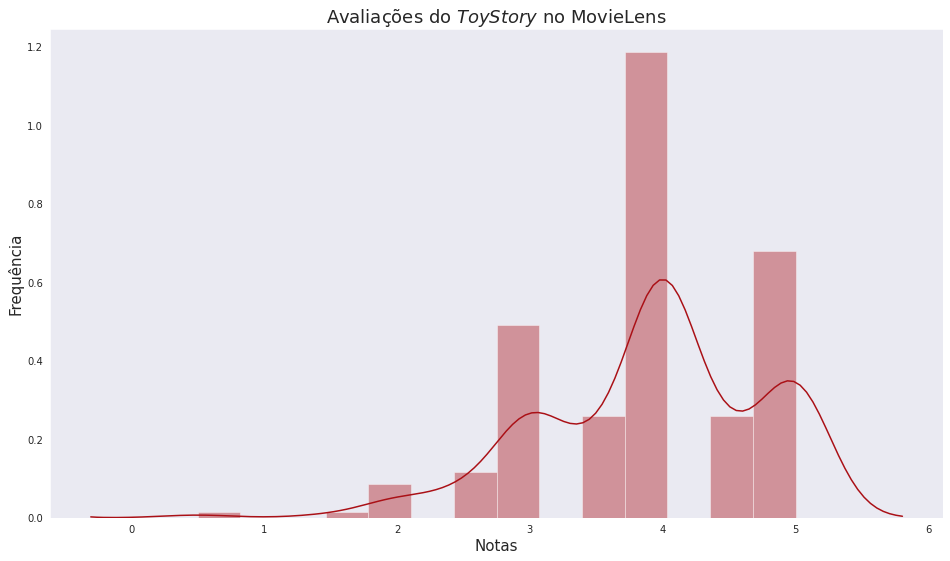

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.distplot(notas_toy_story)
ax.set_xlabel("Notas", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.set_title("Avaliações do $Toy Story$ no MovieLens", fontsize=18)

plt.show()

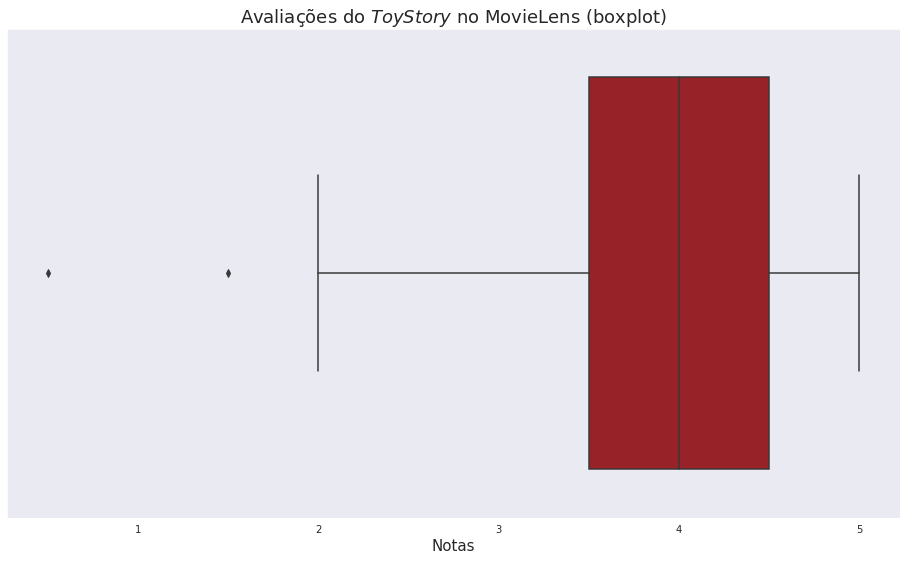

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.boxplot(notas_toy_story)
ax.set_xlabel("Notas", fontsize=15)
ax.set_title("Avaliações do $Toy Story$ no MovieLens (boxplot)", fontsize=18)

plt.show()

Mas isso é suficiente para afirmar que a média do *Toy Story* **de fato** é maior que a média global dos filmes? Para isso, precisamos fazer um **teste z**.

O teste z está implementando na ```statsmodels``` como ```ztest```. Esta função retorna o chamado *p-value* para o teste da hipótese de que a média de uma determinada amostra é igual a um valor específico.

Sendo assim, ao aplicar o ```ztest``` para as avaliações do *Toy Story* (```notas_toy_story```), e aplicar a seguinte sentença lógica com o valor obtido:

$p-value \geq  \alpha \therefore H_0 = 1 $

$p-value < \alpha \therefore H_0 \neq 1 $

Ou seja, para um *p-value* menor que a significância $\alpha$, não há evidências estatísticas que comprove que a média da amostra seja igual ao valor comparado. Da mesma forma, para um *p-value* maior que $\alpha$, temos uma forte evidência de que as médias analisadas são, de fato, diferentes.

Em outras palavras, obter um *p-value* menor que 0,05 nos garante, com 95% de certeza, que a média do *toy Story* é diferente (nesse caso, maior) que a dos demais filmes.

In [ ]:
from statsmodels.stats.weightstats import ztest

ztest(notas_toy_story, value=media_movieLens_com_mais_de_10_votos.mean())


(8.586342305916716, 8.978190401886942e-18)

Note que a função ```ztest()``` retornou dois valores. Estamos ineressados no segundo valor, que representa o *p-value*. Note também que essa valor é extremamente menor que a nossa signficância, ou seja, $p-value << \alpha$. 

Nesse caso, podemos afirmar, com 95% de certeza, que a média do *Toy Story* é maior que a dos demais filmes.

---

**OBS:** Vale lembrar que o valor da média de uma amostra, assim como demonstrado anteriormente, é altamente dependente do tamanho da amostra. Portanto, devemos tomar cuidado ao lidar com testes estatísticos, sempre verificando se a amostra em questão está com dados suficientes, se a distribuição dos dados está de acordo com o teste escolhido, etc.

---



# Comparação entre duas amostras

Na aula passada, demonstramos o processo para aplicarmos o ```ztest()``` e o *p-value* com o intuito de obter evidências estatísticas (ou confirmar a ausência destas) para a comparação de médias.

Porém, assim como visto, é altamente importante trabalhar com valores dentro de intervalos de confiança. Logo, se quisermos, por exemplo, saber o quão maior (ou menor) é a avaliação de um filme do MovieLens em relação a média geral, precisamos obter esse valor quantitativo em função de um **intervalo de confiança**.




## Comparação numérica


Para isso, o procedimento é simples. A função ```zconfint()``` aceita input de duas Series para obter um intervalo da diferença de forma direta. Nesta função, o intervalo retornado é a diferença da média do primeiro conjunto de dados em relação ao segundo.

In [ ]:
zconfint(notas_toy_story, media_movieLens_com_mais_de_10_votos) 

(0.4130845723836817, 0.5646752116620789)

O valor acima nos diz que, com base nos DataFrames analisados, e uma significância de 5%, a média do *Toy Story* é de 0.41 a 0.57 pontos maior que a média geral dos demais filmes.

Podemos ainda obter um *p-value* para a comparação dessas Series usando o ```ztest```.

In [ ]:
ztest(notas_toy_story,media_movieLens_com_mais_de_10_votos)

(12.64176977802645, 1.2422593409480636e-36)

Além do teste Z, podemos usar o Teste t, que é mais recomendado para amostras menores. Este tipo de teste é feito utilizando a biblioteca *StatsModels*. 

**OBS:** É importante garantir que a versão aplicada seja a 0.9.0 ou superior para que as funções aqui apresentadas funcionem bem.

In [ ]:
import statsmodels as sm
sm.__version__

'0.10.2'

Para usar esta biblioteca, precisamos criar um objeto do tipo ```DescrStatsW```  dos dataFrames para analisar.

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

Descr_toy_story = DescrStatsW(notas_toy_story)
Descr_todas_as_notas = DescrStatsW(media_movieLens_com_mais_de_10_votos)


A partir destes objetos, podemos obter o intervalo de confiança para a distruição t ou z,e realizar os respectivos testes. Os métodos são apresentados na [Documentação do *DescrStatsW*](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html).

A seguir, vamos mostrar o procedimento para obter o intervalo de confiança t para a comparação entre os dois conjuntos de dados usando o método ```get_compare()```, que retorna um objeto do tipo ```CompareMeans```.

Na [Documentação do *CompareMeans*](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.CompareMeans.html) obtemos informações sobre os diversos tipos de testes comparativos que podem ser realizados, e também sobre a função ```summary()```, que aplica todos de uma só vez.

In [ ]:
Descr_toy_story.get_compare(Descr_todas_as_notas).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.4889,0.039,12.642,0.000,0.413,0.565


O intervalo apresentado acima é referente ao teste t. Podemos ainda obter o intervalo para o teste Z, usando o parâmentro ```use_t=False```.

In [ ]:
Descr_toy_story.get_compare(Descr_todas_as_notas).summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,0.4889,0.039,12.642,0.000,0.413,0.565


## Comparação visual

Além de obter os intervalos numéricos vistos anteriormente, é importante visualizar a diferença entre as  distribuições de forma gráfica. Uma forma eficiente de comparar estas duas distribuições é utilizando um gráfico boxplot.



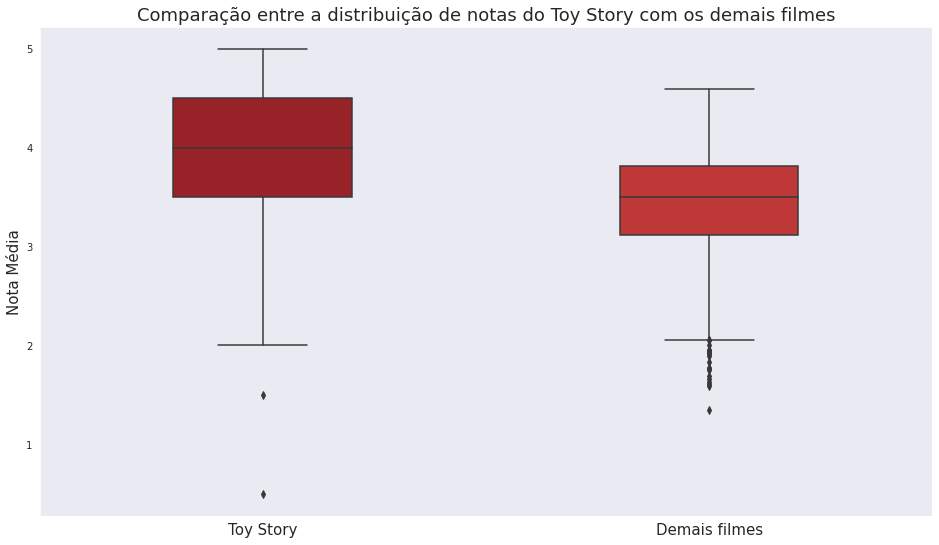

In [ ]:
plt.figure(figsize=(16,9))

ax =sns.boxplot(data=[notas_toy_story, media_movieLens_com_mais_de_10_votos,], width=0.4)
ax.set_xticklabels(['Toy Story', 'Demais filmes'], fontsize=15)
ax.set_ylabel("Nota Média", fontsize=15)
ax.set_title("Comparação entre a distribuição de notas do Toy Story com os demais filmes", fontsize=18)

plt.show()

# Comparando dois filmes

Após abordas os conceitos descritos nas aulas anteriores, vamos aplicar os conhecimentos descritos acima para 3 filmes diferentes.

Vamos pegar o Toy Story que estávamos analisando, e comparar com *Silence of the Lambs* e o *Fantastic Mr. Fox*.

## Procedimentos iniciais

In [ ]:
filmes.query("movieId in (1, 593, 72226)")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Primeiramente, vamos visualizar o tamanho das amostras que temos em relação a estes três filmes, justamente para ver o que podemos fazer acerca dos testes.


In [ ]:
movieLens.query("movieId in (1, 593, 72226)").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


Já podemos notar que o filme *Mr. Fox* não possui muitas avaliações. Logo, temos que estar atentos para utilizar os testes adequados quando efetuarmos comparações.

Vamos criar as Series com as notas para analisarmos e criarmos os plots.

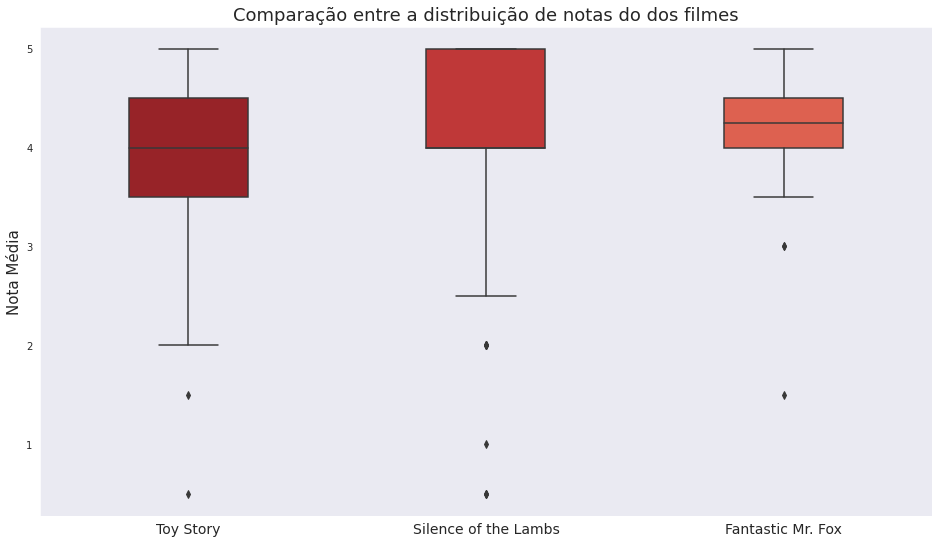

In [ ]:
notas_silence_of_the_lambs = movieLens.query("movieId == 593").rating
notas_mr_Fox = movieLens.query("movieId == 72226").rating

plt.figure(figsize=(16,9))

ax =sns.boxplot(data=[notas_toy_story, notas_silence_of_the_lambs,notas_mr_Fox], width=0.4)
ax.set_xticklabels(['Toy Story', 'Silence of the Lambs', 'Fantastic Mr. Fox'], fontsize=14)
ax.set_ylabel("Nota Média", fontsize=15)
ax.set_title("Comparação entre a distribuição de notas do dos filmes", fontsize=18)

plt.show()

Visualmente, o *Silence of the Lambs* parece ser o melhor filme em termos de avaliações, e os dois filmes inseridos na análise nesse momento parecem ser maisbem avaliados do que o *Toy Story*.

Porém, os testes irão nos auxiliar a descobrir se esta interpretação está correta.

## Aplicando os testes


In [ ]:
# Criando o objeto DescrStats para os outros dois filmes
Descr_Silence_of_the_lambs = DescrStatsW(notas_silence_of_the_lambs)
Descr_Mr_Fox = DescrStatsW(notas_mr_Fox)

Comparando o *Toy Story* com os outros dois filmes. Lembrando que, como o *Mr. Fox* possui poucas avaliações, vamos usar o teste t, e para o *Silence of the Lambs* podemos usar o teste Z.

In [ ]:
Descr_toy_story.get_compare(Descr_Silence_of_the_lambs).summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [ ]:
Descr_toy_story.get_compare(Descr_Mr_Fox).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


Observando os resultados, podemos concluir que temos evidências para afirmar, com 95% de confiança, que *Silence of the Lambs* é um pouco melhor avaliado que *toy Story*. 

Porém, para o *Fantastic Mr. Fox*, o p-value foi maior que a significância (0,05), o que **não nos permite concluir que há diferença** entre as médias com as informações obtidas.

## Testes não-paramétricos

Os testes que apresentamos acima assumem que nosso conjunto de dados segue uma distribuição semelhante a normal.

No início de nossa análise, verificamos visualmente que as notas se distribuem com uma forma parecida com a normal, porém com uma cauda maior à esquerda.

Essa formação desta cauda influencia nos nossos dados a ponto de não podermos afirmar que eles seguem uma distribuição normal? Existe um teste para verificar isso. Ele é implementado na função ```normaltest()``` do SciPy.

In [ ]:
from scipy.stats import normaltest

# Obtendo o p-value para a comparação da distribuição das notas dos filmes com a distribuição normal


#Toy Story
_, p1= normaltest(notas_toy_story)

#Silence of the lambs
_, p2 = normaltest(notas_silence_of_the_lambs)

#Fantastic Mr. Fox
_, p3 = normaltest(notas_mr_Fox)

#Apresentando os resultados

print("P-value do teste de normalidade do Toy Story: ", p1)
print("P-value do teste de normalidade do Silence of the Lambs: ", p2)
print("P-value do teste de normalidade do Fantastic Mr. Fox: ", p3)

P-value do teste de normalidade do Toy Story:  0.00011053430732728716
P-value do teste de normalidade do Silence of the Lambs:  4.667833086075242e-19
P-value do teste de normalidade do Fantastic Mr. Fox:  0.003263254165930067


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


Conforme obserado acima, o p-value de todos as distribuições foi menor que a signficância de 0,05. Além disso, no caso do *Fantastic Mr. Fox*, o teste ainda teve um *warning*,  pois só é válido para $n \geq 20$.

No teste de normalidade do SciPy, a hipótese nula assume que a amostra analisada vem de uma distribuição normal, e obter valores de *p-value* menores que a significância rejeita essa hipótese. Isso significa que os testes t e z que fizemos acima **NÃO SÃO VÁLIDOS**, pois os dados não vem de uma distribuição considerada normal.

Logo, para comparar os valores, precisamos usar métodos **não-paramétricos** de comparação. Um destes métdos é o ```ranksums```, que aplica a estatística Wilcoxon rank-sum para dois conjuntos de dados.

Este teste admite uma hipótese nula de que os conjuntos de dados comparados vêm de uma mesma distribuição. Ou seja, obter $p < \alpha $ indica que uma das amostras tende a ter valores maiores que a outra.

Sendo assim, vamos aplicar os ```ranksums``` as notas analisadas.


In [ ]:
from scipy.stats import ranksums

# Obtendo o p-value para a comparação entre os filmes pelo método de Wilcoxson

#Toy Story e Silence of the lambs
_, p1= ranksums(notas_toy_story,notas_silence_of_the_lambs)

#Toy Story e Fantastic Mr. Fox
_, p2 = ranksums(notas_toy_story,notas_mr_Fox)

#Silence of the lambs e Fantastic Mr. Fox
_, p3 = ranksums(notas_silence_of_the_lambs,notas_mr_Fox)

#Apresentando os resultados

print("P-value da comparação entre Toy Story e Silence of the Lambs: ", p1)
print("P-value da comparação entre Toy Story e Fantastic Mr. Fox: ", p2)
print("P-value da comparação entre Silence of the Lambs e Fantastic Mr. Fox: ", p3)

P-value da comparação entre Toy Story e Silence of the Lambs:  0.0003267718756440693
P-value da comparação entre Toy Story e Fantastic Mr. Fox:  0.27882422330616063
P-value da comparação entre Silence of the Lambs e Fantastic Mr. Fox:  0.7457659303581159


Com base nos resultados acima, é possível afirmar que há uma diferença significativa na distribuição das notas de *Toy Story* e *Silence of the lambs*, enquanto não há diferenças estatísticas significativas para as demais comparações.

Os testes t e z haviam demonstrado o mesmo fenômeno, porém o teste de Wilcoxson é, a rigor, o mais correto para seobter estas conclusões. Enquanto os testes t e z trazem afirmações quantitativas acerca da diferença das médias, o teste de Wilcoxson se preocupa apenas em afirmar que uma das distribuições possui uma probabilidade maior de obter valores maiores que a outra.

Do ponto de vista da avaliação de filmes, o resultado de Wilcoxson é suficiente para concluirmos, superficialmente, se um filme é mais bem avaliado que outro para o público geral. Portanto, os resultados obtidos neste último teste podem nos ajudar a concluir que *Silence of the Lambs* é, de fato, um filme mais bem avaliado do que *Toy Story*.